In [40]:
# Get Ready

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut


In [41]:
# Import data

df = pd.read_csv('dailyadj.csv')
df.head()

,Date,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp (C),dry day,annual
0,10/3/2012,3521,0,0,1,0,0,0,0,0,11.277359,0.0,13.35,1,0.000000
1,10/4/2012,3475,0,0,0,1,0,0,0,0,11.219142,0.0,13.60,1,0.002740
2,10/5/2012,3148,0,0,0,0,1,0,0,0,11.161038,0.0,15.30,1,0.005479
3,10/6/2012,2006,0,0,0,0,0,1,0,0,11.103056,0.0,15.85,1,0.008219
4,10/7/2012,2142,0,0,0,0,0,0,1,0,11.045208,0.0,15.85,1,0.010959


In [42]:
# Set features and response variable

X = df.drop(['Total','Date'],axis=1)
y = df['Total']

### *OLS Model*

In [53]:
# Fit model

model = LinearRegression(fit_intercept=False)
model.fit(X, y)

LinearRegression(fit_intercept=False)

In [44]:
# CV Score w/10 folds -> average crossval score rounded to 4 decimal places

cross_val_score(model, X, y, cv=10).mean().round(4)

0.7692

#### Cross Validation Score for OLS = 0.7692

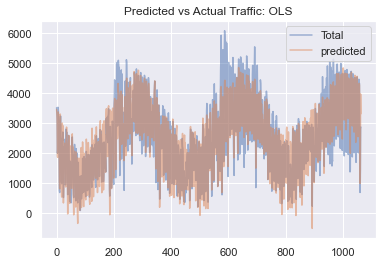

In [67]:
# Total vs Predicted Traffic for OLS Model
df_a = df
df_a['predicted'] = model.predict(X)
df_a[['Total', 'predicted']].plot(alpha=0.5);
plt.title('Predicted vs Actual Traffic: OLS');

### *Ridge Regression Model*

In [45]:
# Ridge Regression with lambda of 0.1
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_rand

In [46]:
# uniform distribution to sample alpha parameter from
param_grid = {'alpha': sp_rand(0,100)}

# fit ridge regression model and test sampled alpha values
model = Ridge()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=1000, cv=10)
rsearch.fit(X, y)

# summarize the results of the random parameter search
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

0.7710708812340947
4.599745155039992


In [57]:
# Ridge Regression with BEST alpha of 4.63
modelR = Ridge(alpha = 4.63)
modelR.fit(X,y)

Ridge(alpha=4.63)

In [48]:
# CV Score w/10 folds -> average crossval score rounded to 4 decimal places

cross_val_score(modelR, X, y, cv=10).mean().round(4)

0.7711

#### Cross Validation Score for Ridge Regression is 0.7711

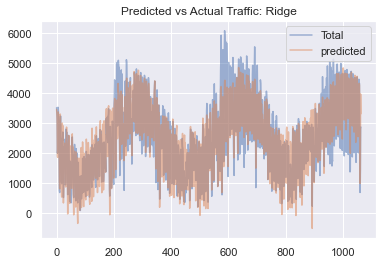

In [68]:
# Total vs Predicted Traffic for Ridge Regression Model
df_b = df
df_b['predicted'] = model.predict(X)
df_b[['Total', 'predicted']].plot(alpha=0.5);
plt.title('Predicted vs Actual Traffic: Ridge');

### *Lasso Regression Model*


In [49]:
# uniform distribution to sample alpha parameter values from
param_grid = {'alpha': sp_rand(0,100)}

# fit ridge regression model and test sampled alpha values
model = Lasso(max_iter=10000)
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=1000, cv=10)
rsearch.fit(X, y)

# summarize the results of the random parameter search
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

0.770891958480105
3.8119656024019455


In [59]:
# Lasso Regression with BEST alpha of 3.79
modelL = Lasso(alpha = 3.79, max_iter = 10000)
modelL.fit(X,y)

Lasso(alpha=3.79, max_iter=10000)

In [51]:
# CV Score w/10 folds -> average crossval score rounded to 4 decimal places

cross_val_score(modelL, X, y, cv=10).mean().round(4)

0.7709

#### Cross Validation Score for Lasso Regression Model is 0.7709

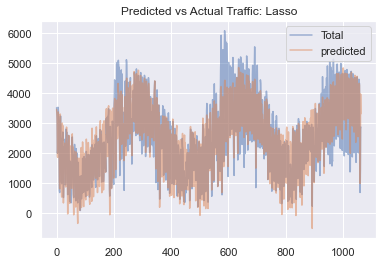

In [66]:
# Total vs Predicted Traffic for Lasso Model
df_c = df
df_c['predicted'] = model.predict(X)
df_c[['Total', 'predicted']].plot(alpha=0.5);
plt.title('Predicted vs Actual Traffic: Lasso');